In [57]:
import numpy as np
from numpy import sin, exp, log
from scipy.optimize import minimize, differential_evolution

In [58]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Задача 1. Минимизация гладкой функции

In [59]:
# sin(x / 5.) * exp(x / 10.) + 5 * exp(-x / 2.)

In [60]:
def f(x):
    return sin(x / 5.) * exp(x / 10.) + 5 * exp(-x / 2.)

In [61]:
a = 1
b = 30

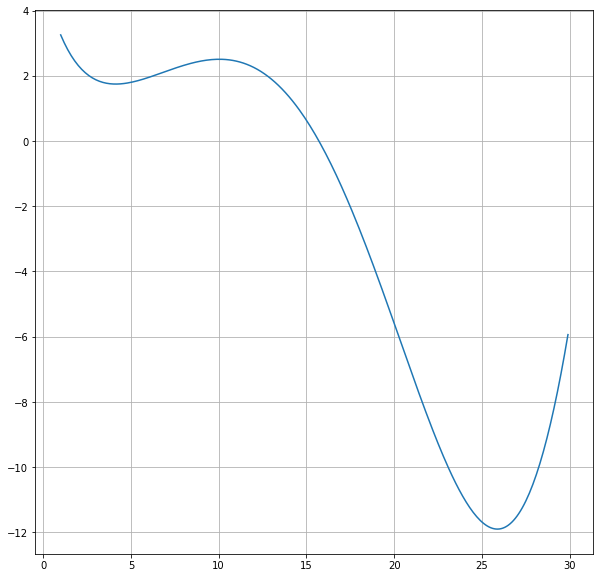

In [62]:
x = np.arange(a, b, 0.1)
y = f(x)

plt.figure(figsize=(10, 10))
plt.grid()
plt.plot(x, y)
plt.show()

In [63]:
minimize(fun=f, x0=0)

      fun: 1.7452682903319903
 hess_inv: array([[6.02455355]])
      jac: array([-8.94069672e-08])
  message: 'Optimization terminated successfully.'
     nfev: 27
      nit: 8
     njev: 9
   status: 0
  success: True
        x: array([4.13628824])

In [64]:
minimize(fun=f, x0=20)

      fun: -11.898894665971952
 hess_inv: array([[1.68469947]])
      jac: array([-3.33786011e-06])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 4
     njev: 7
   status: 0
  success: True
        x: array([25.88018742])

In [65]:
minimize(fun=f, x0=2, method='BFGS')

      fun: 1.745268290344928
 hess_inv: array([[5.98750711]])
      jac: array([-2.05636024e-06])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([4.13627619])

In [66]:
minimize(fun=f, x0=30, method='BFGS')

      fun: -11.898894665981322
 hess_inv: array([[1.67940841]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([25.880193])

# Задача 2. Глобальная оптимизация

In [69]:
differential_evolution(func=f, bounds=[(a, b)])

     fun: array([-11.89889467])
     jac: array([1.77635684e-07])
 message: 'Optimization terminated successfully.'
    nfev: 96
     nit: 5
 success: True
       x: array([25.88019345])

# Задача 3. Минимизация негладкой функции

In [70]:
def h(x):
    return int(f(x))

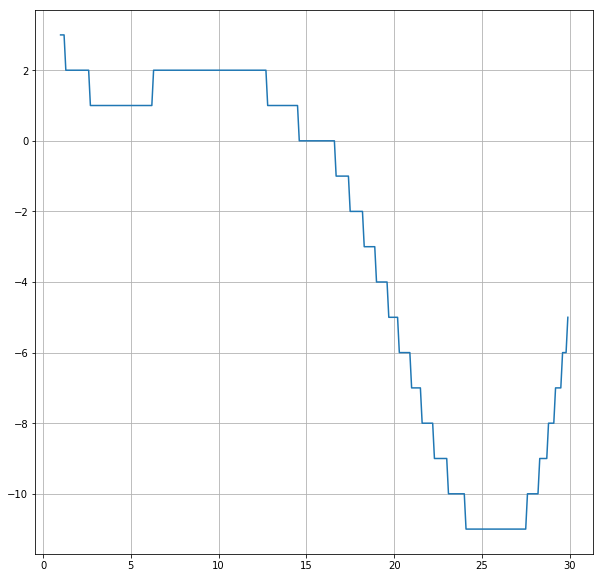

In [71]:
x = np.arange(a, b, 0.1)

plt.figure(figsize=(10, 10))
plt.grid()
plt.plot(x, list(map(h, x)))
plt.show()

In [72]:
minimize(fun=h, x0=30, method='BFGS')

      fun: -5
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([30.])

In [73]:
differential_evolution(func=h, bounds=[(a, b)])

     fun: -11.0
 message: 'Optimization terminated successfully.'
    nfev: 77
     nit: 4
 success: True
       x: array([25.90430517])

# Задача 4. Минимизация функции нескольких переменных

In [74]:
def f(x):
    return x[0]**2 + x[1]**2

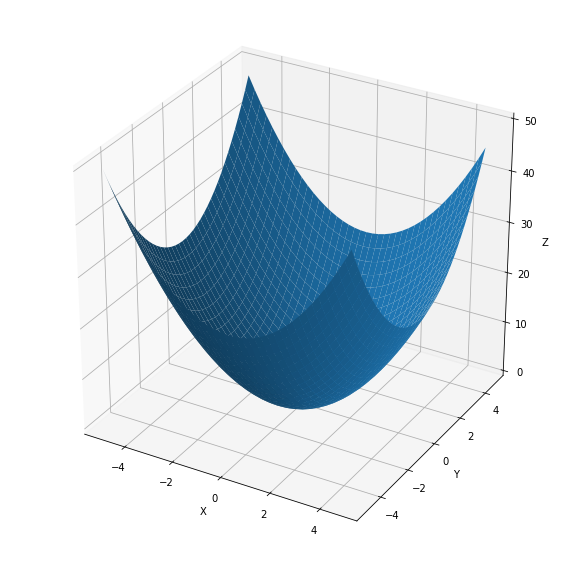

In [75]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d') # get current axis

# Создаем массивы NumPy с координатами точек по осям X и У. 
# Используем метод meshgrid, при котором по векторам координат 
# создается матрица координат. Задаем нужную функцию Z(x, y).
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = f([X, Y])

# Наконец, используем метод *plot_surface* объекта 
# типа Axes3DSubplot. Также подписываем оси.
surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [39]:
minimize(fun=f, x0=[1, -1])

      fun: 3.865407235741147e-16
 hess_inv: array([[0.75, 0.25],
       [0.25, 0.75]])
      jac: array([-1.62848344e-08, -9.04871511e-09])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([-1.55929978e-08, -1.19749382e-08])

In [78]:
differential_evolution(func=f, bounds=[(-5, 5), (-5, 5)])

     fun: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 2823
     nit: 93
 success: True
       x: array([0., 0.])

# Задача 4. Задачи оптимизации

In [79]:
def f(x):
    return - 4*x[0] - 6*x[1]

In [80]:
x0 = [0, 0]

In [81]:
bnds = ((0, None), (0, None))

In [82]:
cons = ({'type': 'ineq', 'fun': lambda x:  18 - x[0] - x[1]},
        {'type': 'ineq', 'fun': lambda x: 12 - 0.5*x[0] - x[1]},
        {'type': 'ineq', 'fun': lambda x: 12 - x[0]},
        {'type': 'ineq', 'fun': lambda x: 9 - x[1]})

In [83]:
minimize(fun=f, x0=x0, bounds=bnds, constraints=cons ,method='SLSQP')

     fun: -83.99999999981839
     jac: array([-4., -6.])
 message: 'Optimization terminated successfully.'
    nfev: 20
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([12.,  6.])

In [84]:
help(minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    Parameters
    ----------
    fun : callable
        The objective function to be minimized.
    
            ``fun(x, *args) -> float``
    
        where x is an 1-D array with shape (n,) and `args`
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial guess. Array of real elements of size (n,),
        where 'n' is the number of independent variables.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (`fun`, `jac` and `hess` functions).
    method : str or callable, optional
        Type of solver.  Should be one of
    
            - 'Nelder-Mead' :ref:`(see here) <op